## Sparks foundation #Gripjuly22 task 1 ,by Devesh Kumar

## Bussiness Problem

In [36]:
#import Liabraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


### Load Dataset

In [37]:
path = r"https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv"
df = pd.read_csv(path)

In [38]:
df.shape

(25, 2)

## Discover and visualize the data to gain insights

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [40]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


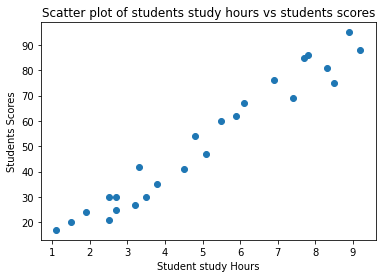

In [41]:
plt.scatter(x=df.Hours,y=df.Scores)
plt.xlabel("Student study Hours")
plt.ylabel("Students Scores")
plt.title("Scatter plot of students study hours vs students scores")
plt.show()

## Prepare the data for machine learning algorithms

In [42]:
# Data Cleaning
df.isnull().sum()

Hours     0
Scores    0
dtype: int64

In [79]:
#split dataset
X = df.drop("Scores",axis="columns")
y = df.drop("Hours",axis="columns")
print("shape of X = ",X.shape)
print("shape of y = ",y.shape)


shape of X =  (25, 1)
shape of y =  (25, 1)


In [80]:
from sklearn.model_selection import train_test_split
X_train , X_test,y_train,y_test = train_test_split(X,y, test_size = 0.20, random_state=0)
print("shape of X_train = ",X_train.shape)
print("shape of y_train = ",y_train.shape)
print("shape of X_test = ",X_test.shape)
print("shape of y_test = ",y_test.shape)

shape of X_train =  (20, 1)
shape of y_train =  (20, 1)
shape of X_test =  (5, 1)
shape of y_test =  (5, 1)


## Select model and train it

In [81]:
# y = m*x+c
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [82]:
lr.fit(X_train,y_train)

LinearRegression()

In [83]:
lr.coef_

array([[9.91065648]])

In [84]:
lr.intercept_

array([2.01816004])

In [86]:
m = 9.911
c = 2.018
y = m*8 + c
y

81.306

In [87]:
lr.predict([[8]])[0][0].round(2)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


81.3

In [88]:
y_pred = lr.predict(X_test)
y_pred

array([[16.88414476],
       [33.73226078],
       [75.357018  ],
       [26.79480124],
       [60.49103328]])

In [89]:
pd.DataFrame(np.c_[X_test,y_test,y_pred], columns = ["Study Hours","Scores_Original","Scores_predicted"])

,Study Hours,Scores_Original,Scores_predicted
0,1.5,20.0,16.884145
1,3.2,27.0,33.732261
2,7.4,69.0,75.357018
3,2.5,30.0,26.794801
4,5.9,62.0,60.491033


## Fine-tune your model

In [90]:
lr.score(X_test,y_test)

0.9454906892105354

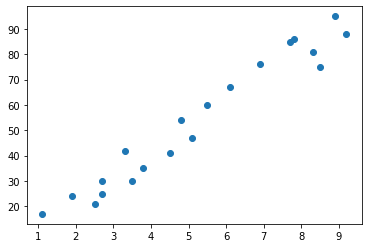

In [91]:
plt.scatter(X_train,y_train)

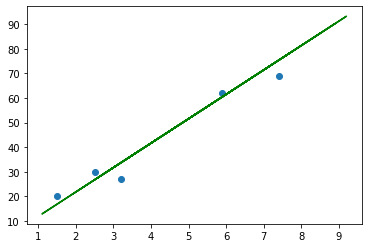

In [92]:
plt.scatter(X_test,y_test)
plt.plot(X_train,lr.predict(X_train),color="g")

## Present your solution

## Save ML Model

In [93]:
import joblib
joblib.dump(lr,"Scores_predictor_dk_model.pkl")

['Scores_predictor_dk_model.pkl']

In [94]:
model = joblib.load("Scores_predictor_dk_model.pkl")


In [95]:
model.predict([[8.5]])[0][0]

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


86.25874012689371